## Problem Statement:

One of the hospitals has a patient dataset that contains a wide range of heart-related features. This data allows hospital staff to conduct detailed analyses of heart-related conditions and treatments. We must build a logistic regression model to predict whether a patient has heart disease or not. Calculate the feature importance as well. The dataset contains data for around 303 patients.

### Import Libraries

In [1]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
import warnings
warnings.filterwarnings('ignore')

### Exploratory Data Analysis (EDA)

In [2]:
#Loading dataset

df = pd.read_csv('heart_disease.csv')
df.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
#Checking shape of the dataset

df.shape

(303, 14)

In [4]:
#Checking the summary information of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              303 non-null    float64
 1   gender           303 non-null    float64
 2   cp               303 non-null    float64
 3   trestbps         303 non-null    float64
 4   chol             303 non-null    float64
 5   fbs              303 non-null    float64
 6   restecg          303 non-null    float64
 7   thalach          303 non-null    float64
 8   exang            303 non-null    float64
 9   oldpeak          303 non-null    float64
 10  slope            303 non-null    float64
 11  ca               299 non-null    float64
 12  thal             301 non-null    float64
 13  heart_diagnosis  303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [6]:
#Droping rows with missing values

df.dropna(inplace=True)

In [7]:
#Checking null values

df.isnull().sum()

age                0
gender             0
cp                 0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
heart_diagnosis    0
dtype: int64

In [8]:
#Summary Statistics for numerical columns

df.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_diagnosis
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


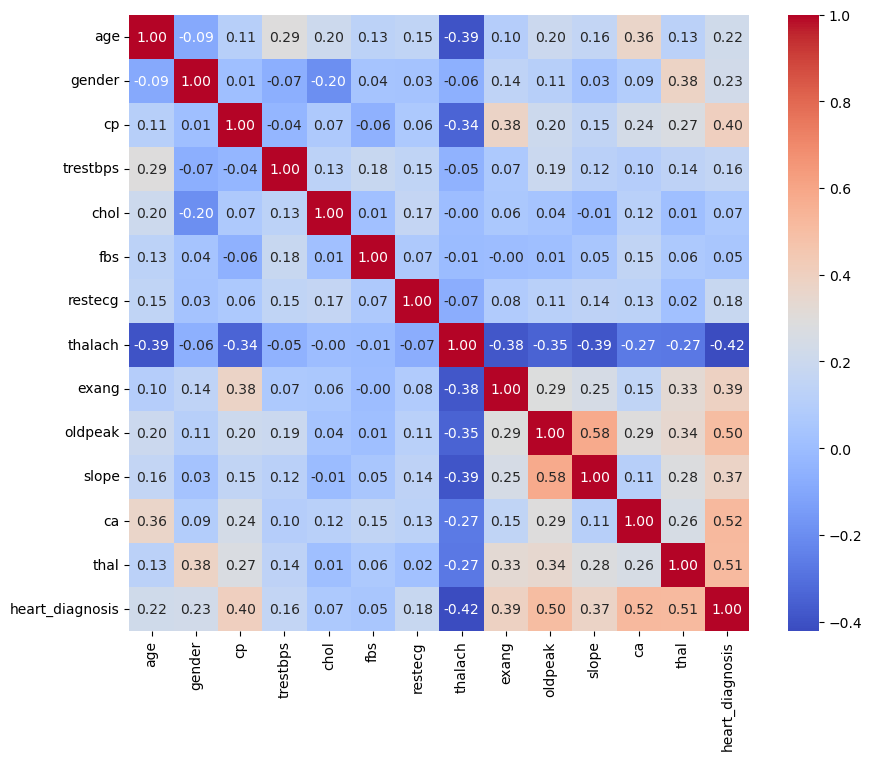

In [9]:
#Checking Correlations

plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
correlation_heatmaps = sns.heatmap(corr,
                                  xticklabels=corr.columns,
                                  yticklabels=corr.columns,
                                  annot=True,
                                  cmap='coolwarm',
                                  fmt='.2f')
plt.show()

In [10]:
heart_diagnosis_distribution = df['heart_diagnosis'].value_counts
print('Target variable distribution:\n', heart_diagnosis_distribution)

Target variable distribution:
 <bound method IndexOpsMixin.value_counts of 0      0
1      2
2      1
3      0
4      0
      ..
297    1
298    1
299    2
300    3
301    1
Name: heart_diagnosis, Length: 297, dtype: int64>


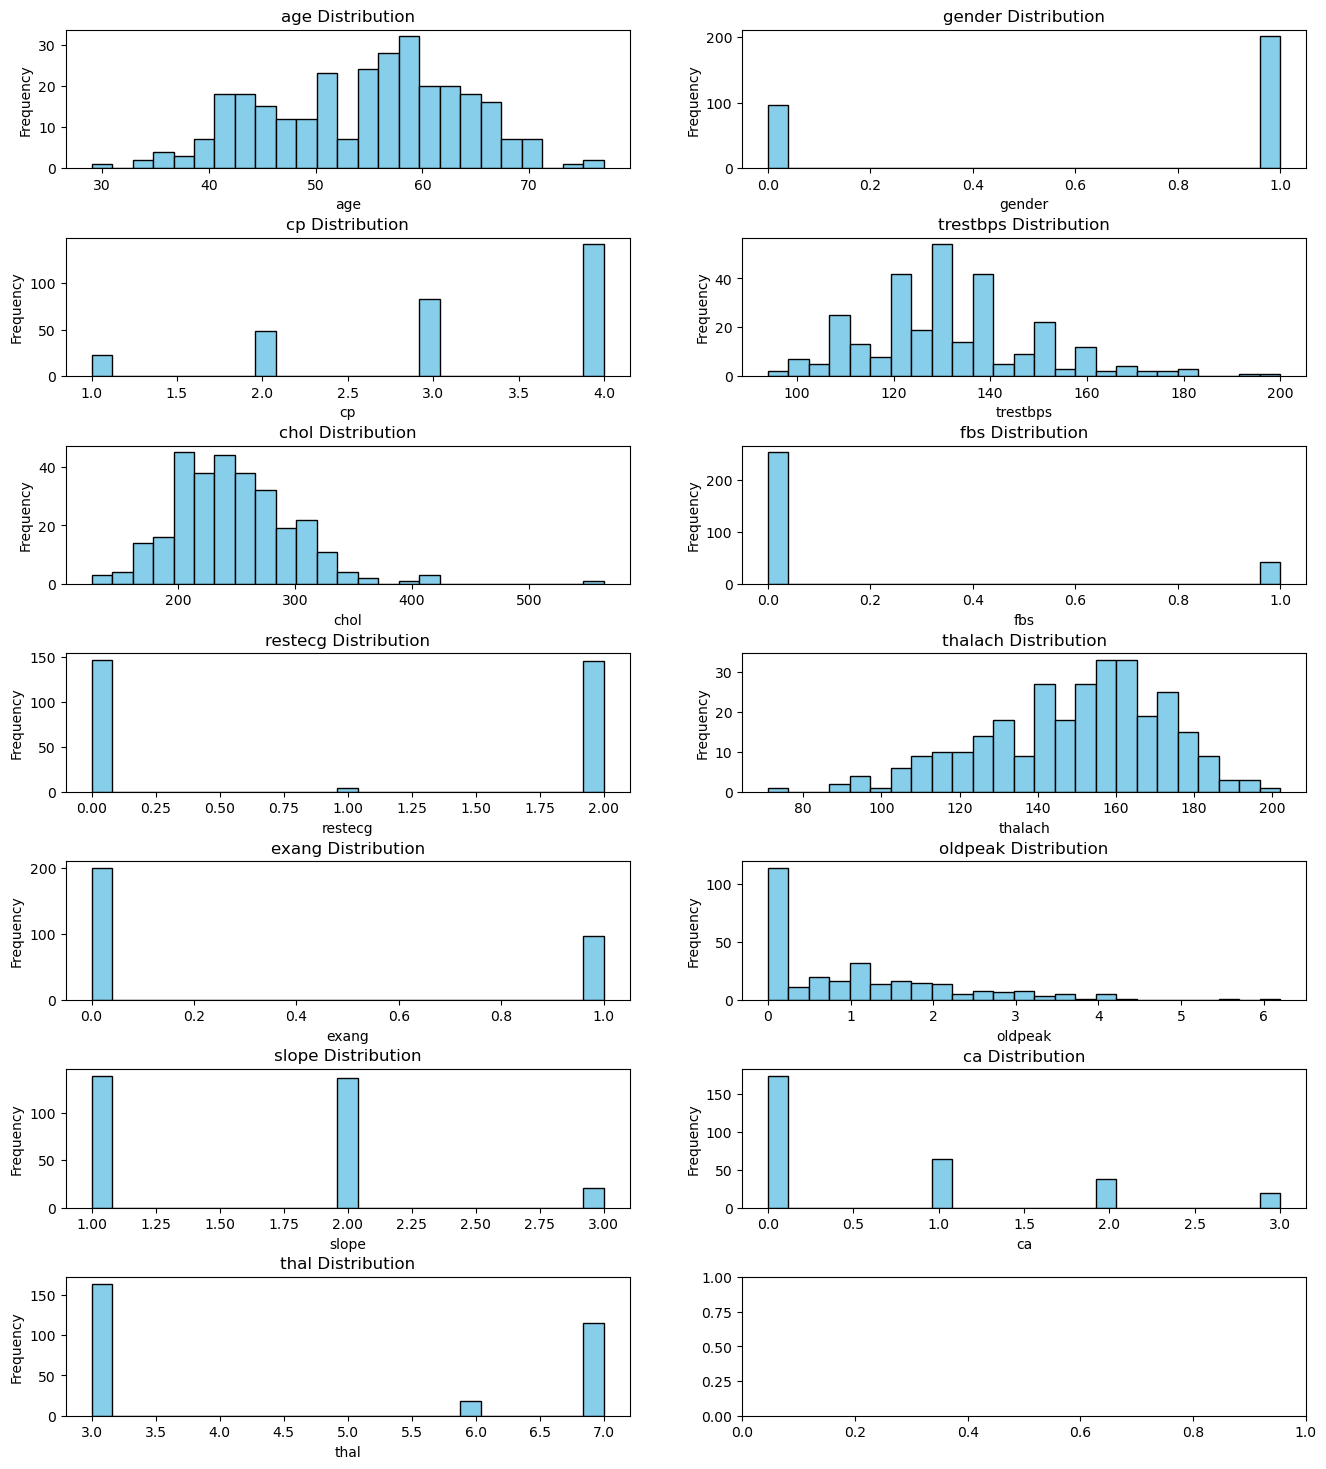

In [11]:
# Define the number of columns and rows for subplots

num_cols = df.shape[1]         # Number of columns in the DataFrame
num_rows = (num_cols - 1) // 2 + 1 # Calculate the number of rows needed for subplots 

# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(16, 18))
fig.subplots_adjust(hspace=0.5) # Adjust vertical spacing between subplots

# Flatten the axes array for easire iteration
axes = axes.flatten()

# Plot histogram for each column
for i, column in enumerate(df.columns):
    if column == 'heart_diagnosis':
        continue # Skip the target variable
    ax = axes[i]
    ax.hist(df[column], bins=25, color='skyblue', edgecolor='black')
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel(column) # set label for x-axis
    ax.set_ylabel('Frequency') # set label for y-axis
    
# Remove any empty subplots
for i in range(len(df.columns), len(axes)):
    fig.delaxes(axes[i])
    
# show the subplots
plt.show()

Write a lambda function that will assign 0 when heart_diagnosis is 0 and when >=0 as 1

In [12]:
df['heart_diagnosis'] = df['heart_diagnosis'].apply(lambda x: 0 if x else 1)

In [13]:
heart_diagnosis_distribution_pp = df['heart_diagnosis'].value_counts()
print('Target variable distribution after preprocessing:\n', heart_diagnosis_distribution_pp)

Target variable distribution after preprocessing:
 heart_diagnosis
1    160
0    137
Name: count, dtype: int64


In [14]:
# transform the categorical columns to numerical columns.

columns_to_encode = ['cp', 'restecg', 'ca', 'thal']
df[columns_to_encode] = df[columns_to_encode].astype(str)
df=pd.concat([df, pd.get_dummies(df[columns_to_encode])], axis=1)
df.drop(columns=df[columns_to_encode], inplace=True)

In [15]:
df.columns

Index(['age', 'gender', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'oldpeak', 'slope', 'heart_diagnosis', 'cp_1.0', 'cp_2.0', 'cp_3.0',
       'cp_4.0', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'ca_0.0',
       'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

In [16]:
df.head()

,age,gender,trestbps,chol,fbs,thalach,exang,oldpeak,slope,heart_diagnosis,...,restecg_0.0,restecg_1.0,restecg_2.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,3.0,1,...,False,False,True,True,False,False,False,False,True,False
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,2.0,0,...,False,False,True,False,False,False,True,True,False,False
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,False,False,True,False,False,True,False,False,False,True
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,3.0,1,...,True,False,False,True,False,False,False,True,False,False
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,1.0,1,...,False,False,True,True,False,False,False,True,False,False


### Split the data into train and test sets

In [17]:
X = df.drop('heart_diagnosis', axis=1)
y = df['heart_diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (237, 23)
X_test (60, 23)
y_train (237,)
y_test (60,)


In [18]:
X_train.columns

Index(['age', 'gender', 'trestbps', 'chol', 'fbs', 'thalach', 'exang',
       'oldpeak', 'slope', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0',
       'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'ca_0.0', 'ca_1.0',
       'ca_2.0', 'ca_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

In [19]:
scaler = StandardScaler()
X_train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope']] = (scaler.fit_transform(X_train[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope']]))

X_test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope']] = (scaler.fit_transform(X_test[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope']]))

### Skewed Data

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_skewed = model.predict(X_test)

In [21]:
y_pred_skewed

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [22]:
accuracy_skewed = accuracy_score(y_test, y_pred_skewed)
auc_roc_skewed = roc_auc_score(y_test, y_pred_skewed)
conf_matrix_skewed = confusion_matrix(y_test, y_pred_skewed)
class_report_skewed = classification_report(y_test, y_pred_skewed)

print('Accuracy: ', accuracy_skewed)
print('AUC-ROC Score: ', auc_roc_skewed)
print('Confusion Matrix:\n', conf_matrix_skewed)
print('Classification Report:\n', class_report_skewed)

Accuracy:  0.8
AUC-ROC Score:  0.8125
Confusion Matrix:
 [[21  3]
 [ 9 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.88      0.78        24
           1       0.90      0.75      0.82        36

    accuracy                           0.80        60
   macro avg       0.80      0.81      0.80        60
weighted avg       0.82      0.80      0.80        60



In [23]:
model_coefs = model.coef_
model_intercept = model.intercept_
print('Coefficients: ', model_coefs)
print('Intercept: ', model_intercept)

Coefficients:  [[ 0.14502502 -1.2148995  -0.47553112 -0.26607941  0.65003879  0.49575986
  -0.54717753 -0.57945185 -0.26081498  0.51103173 -0.30847706  0.6789848
  -0.88182412  0.17507695 -0.02638609 -0.14897551  1.5864761  -0.5579454
  -0.768767   -0.26004834  0.31303421  0.55393833 -0.86725719]]
Intercept:  [0.57934584]


In [24]:
importances = pd.DataFrame({'Feature':X.columns, 'Importance':np.abs(model.coef_[0])})
importances = importances.sort_values('Importance', ascending=False)
print('Feature Importances:\n', importances)

Feature Importances:
         Feature  Importance
16       ca_0.0    1.586476
1        gender    1.214899
12       cp_4.0    0.881824
22     thal_7.0    0.867257
18       ca_2.0    0.768767
11       cp_3.0    0.678985
4           fbs    0.650039
7       oldpeak    0.579452
17       ca_1.0    0.557945
21     thal_6.0    0.553938
6         exang    0.547178
9        cp_1.0    0.511032
5       thalach    0.495760
2      trestbps    0.475531
20     thal_3.0    0.313034
10       cp_2.0    0.308477
3          chol    0.266079
8         slope    0.260815
19       ca_3.0    0.260048
13  restecg_0.0    0.175077
15  restecg_2.0    0.148976
0           age    0.145025
14  restecg_1.0    0.026386


In [25]:
rus = RandomUnderSampler(random_state=42)
X_undersample, y_undersample = rus.fit_resample(X_train, y_train)
print("X_undersample shape: ", X_undersample.shape)
print("X_test shape: ", X_test.shape)
print("y_undersample shape: ", y_undersample.shape)
print("y_test sample: ", y_test.shape)

X_undersample shape:  (226, 23)
X_test shape:  (60, 23)
y_undersample shape:  (226,)
y_test sample:  (60,)


In [26]:
model_undersampled = LogisticRegression()
model_undersampled.fit(X_undersample, y_undersample)
y_pred_undersampled = model_undersampled.predict(X_test)

In [27]:
# Models Performance

accuracy_undersampled = accuracy_score(y_pred_undersampled, y_test)
auc_roc_undersampled = roc_auc_score(y_test, y_pred_undersampled)
conf_matrix_undersampled = confusion_matrix(y_test, y_pred_undersampled)
class_report_undersampled = classification_report(y_test, y_pred_undersampled)

print('Accuracy: ', accuracy_undersampled)
print('Confusion Matrix:\n', conf_matrix_undersampled)
print('Classification Report:\n', class_report_undersampled)

Accuracy:  0.8333333333333334
Confusion Matrix:
 [[23  1]
 [ 9 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.96      0.82        24
           1       0.96      0.75      0.84        36

    accuracy                           0.83        60
   macro avg       0.84      0.85      0.83        60
weighted avg       0.87      0.83      0.83        60



### Feature importance of model developed using undersampled data

In [28]:
model_undersampled_coefs = model_undersampled.coef_
model_undersampled_intercept = model_undersampled.intercept_
print('Coefficients: ', model_undersampled_coefs)
print('Intercept: ', model_undersampled_intercept)

Coefficients:  [[ 0.11321987 -1.17721157 -0.54295829 -0.22152758  0.69853295  0.5894704
  -0.48352074 -0.63340251 -0.14482654  0.61571405 -0.34156386  0.66308228
  -0.93724418  0.25844239  0.01720346 -0.27565755  1.50346244 -0.54898514
  -0.73248927 -0.22199973  0.43378823  0.37708034 -0.81088027]]
Intercept:  [0.41189362]


In [29]:
importances_undersampled = pd.DataFrame({'Feature':X.columns, 'Importance':np.abs(model_undersampled.coef_[0])})
importances_undersampled = importances_undersampled.sort_values('Importance', ascending=False)
print('Feature Importances:\n', importances_undersampled)

Feature Importances:
         Feature  Importance
16       ca_0.0    1.503462
1        gender    1.177212
12       cp_4.0    0.937244
22     thal_7.0    0.810880
18       ca_2.0    0.732489
4           fbs    0.698533
11       cp_3.0    0.663082
7       oldpeak    0.633403
9        cp_1.0    0.615714
5       thalach    0.589470
17       ca_1.0    0.548985
2      trestbps    0.542958
6         exang    0.483521
20     thal_3.0    0.433788
21     thal_6.0    0.377080
10       cp_2.0    0.341564
15  restecg_2.0    0.275658
13  restecg_0.0    0.258442
19       ca_3.0    0.222000
3          chol    0.221528
8         slope    0.144827
0           age    0.113220
14  restecg_1.0    0.017203


In [30]:
smote = SMOTE(random_state=42)
X_oversample, y_oversample = smote.fit_resample(X_train, y_train)
print('X_oversample shape:', X_oversample.shape)
print('X_test shape:', X_test.shape)
print('y_oversample shape:', y_oversample.shape)
print('y_test shape:', y_test.shape)

X_oversample shape: (248, 23)
X_test shape: (60, 23)
y_oversample shape: (248,)
y_test shape: (60,)


In [31]:
model_oversampled = LogisticRegression()
model_oversampled.fit(X_oversample, y_oversample)
y_pred_oversampled = model_oversampled.predict(X_test)

In [32]:
# Models Performance

accuracy_oversampled = accuracy_score(y_pred_oversampled, y_test)
auc_roc_oversampled = roc_auc_score(y_test, y_pred_oversampled)
conf_matrix_oversampled = confusion_matrix(y_test, y_pred_oversampled)
class_report_oversampled = classification_report(y_test, y_pred_oversampled)

print('Accuracy: ', accuracy_oversampled)
print('AUC-ROC Score: ', auc_roc_oversampled)
print('Confusion Matrix:\n', conf_matrix_oversampled)
print('Classification Report:\n', class_report_oversampled)

Accuracy:  0.8166666666666667
AUC-ROC Score:  0.8333333333333333
Confusion Matrix:
 [[22  2]
 [ 9 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.92      0.80        24
           1       0.93      0.75      0.83        36

    accuracy                           0.82        60
   macro avg       0.82      0.83      0.82        60
weighted avg       0.84      0.82      0.82        60



### Feature importance of model developed using oversampled data

In [33]:
model_oversampled_coefs = model_oversampled.coef_
model_oversampled_intercept = model_oversampled.intercept_
print('Coefficients: ', model_oversampled_coefs)
print('Intercept: ', model_oversampled_intercept)

Coefficients:  [[ 0.11225675 -1.24661372 -0.42723709 -0.26475358  0.66074703  0.48671457
  -0.52663108 -0.60486844 -0.24537183  0.26293661 -0.47935593  0.39427097
  -1.1986339   0.09909108 -0.03061299 -0.16648935  1.39774435 -0.81231732
  -0.93315974 -0.32283521  0.01579038  0.40842621 -1.14165438]]
Intercept:  [1.34117288]


In [34]:
importances_oversampled = pd.DataFrame({'Feature':X.columns, 'Importance':np.abs(model_oversampled.coef_[0])})
importances_oversampled = importances_oversampled.sort_values('Importance', ascending=False)
print('Feature Importances:\n', importances_oversampled)

Feature Importances:
         Feature  Importance
16       ca_0.0    1.397744
1        gender    1.246614
12       cp_4.0    1.198634
22     thal_7.0    1.141654
18       ca_2.0    0.933160
17       ca_1.0    0.812317
4           fbs    0.660747
7       oldpeak    0.604868
6         exang    0.526631
5       thalach    0.486715
10       cp_2.0    0.479356
2      trestbps    0.427237
21     thal_6.0    0.408426
11       cp_3.0    0.394271
19       ca_3.0    0.322835
3          chol    0.264754
9        cp_1.0    0.262937
8         slope    0.245372
15  restecg_2.0    0.166489
0           age    0.112257
13  restecg_0.0    0.099091
14  restecg_1.0    0.030613
20     thal_3.0    0.015790
